<a href="https://colab.research.google.com/github/Umang32/russia_ukraine_war_2022/blob/main/russia_ukraine_war_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode (connected = True)
import re


## **Start**

In [2]:
df_tweet = pd.read_csv("/content/filename.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df_tweet.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1496898037641269253,1496897147173842955,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,786655582224777216,dmlitman,David Litman,NaN,@Angelina_Kaz They're happening. Even in Russi...,en,[],[],[],0,0,0,[],[],https://twitter.com/dmlitman/status/1496898037...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Angelina_Kaz', 'name': 'Ange...",NaN,NaN,NaN,NaN
1,1496898037477789698,1496898037477789698,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1584640873,gm_silverman,Dan Silverman,NaN,How can Putin act like this is driven by fear ...,en,[],[],[],1,0,0,[],[],https://twitter.com/gm_silverman/status/149689...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1496898037356142600,1496885342619668481,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,709061254090985472,acilith,Acilith,NaN,@Ac7ionMan @MalibucaFN @stormyrite @FNCompetit...,en,[],[],[],0,0,0,[],[],https://twitter.com/Acilith/status/14968980373...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Ac7ionMan', 'name': 'Ac7ionM...",NaN,NaN,NaN,NaN
3,1496898037347598336,1496847460710469636,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,2503669940,rubenba40546243,Rhubarb,NaN,@joncoopertweets Idiots who brazenly promote t...,en,[],[],[],0,0,0,[],[],https://twitter.com/RubenBa40546243/status/149...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'joncoopertweets', 'name': 'J...",NaN,NaN,NaN,NaN
4,1496898036970229770,1496898036970229770,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1145764266731028481,wecarolk,ca,NaN,russia fazia parte,it,[],[],[],0,0,0,[],[],https://twitter.com/wecarolk/status/1496898036...,False,https://twitter.com/rafakalimann_/status/14968...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
#df_tweet = df_tweet[['date', 'time','tweet']]

In [4]:
df_tweet['tweet'].head()

0    @Angelina_Kaz They're happening. Even in Russi...
1    How can Putin act like this is driven by fear ...
2    @Ac7ionMan @MalibucaFN @stormyrite @FNCompetit...
3    @joncoopertweets Idiots who brazenly promote t...
4                                   russia fazia parte
Name: tweet, dtype: object

In [5]:
type(df_tweet['tweet'])

pandas.core.series.Series

In [6]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [9]:
hashtags = hashtag_extract(df_tweet["tweet"])
hashtags = sum(hashtags, [])

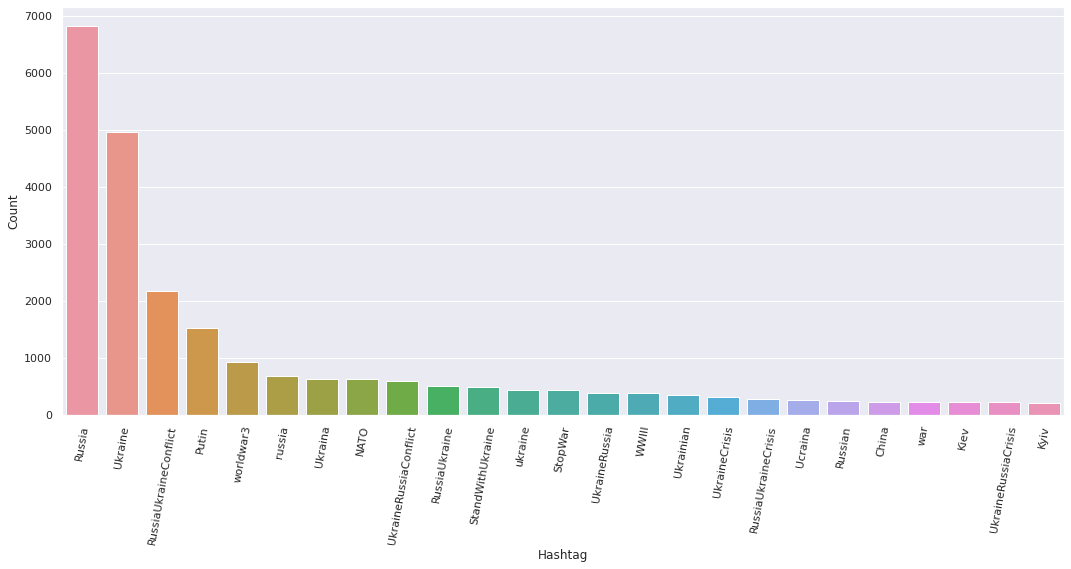

In [ ]:
generate_hashtag_freqdist(hashtags)

In [10]:
#clean the tweet
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+',"",str(text))
  text = re.sub(r'#','',str(text))
  text = re.sub(r'RT[\s]+','',str(text))
  text = re.sub(r'https?:\/\/s+','',str(text))


  return text

df_tweet['tweet'] = df_tweet['tweet'].apply(cleanText)
df_tweet

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1496898037641269253,1496897147173842955,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,786655582224777216,dmlitman,David Litman,NaN,_Kaz They're happening. Even in Russia. Saw im...,en,[],[],[],0,0,0,[],[],https://twitter.com/dmlitman/status/1496898037...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Angelina_Kaz', 'name': 'Ange...",NaN,NaN,NaN,NaN
1,1496898037477789698,1496898037477789698,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1584640873,gm_silverman,Dan Silverman,NaN,How can Putin act like this is driven by fear ...,en,[],[],[],1,0,0,[],[],https://twitter.com/gm_silverman/status/149689...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1496898037356142600,1496885342619668481,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,709061254090985472,acilith,Acilith,NaN,"He's bringing up Fortnite, cus maybe Fortn...",en,[],[],[],0,0,0,[],[],https://twitter.com/Acilith/status/14968980373...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Ac7ionMan', 'name': 'Ac7ionM...",NaN,NaN,NaN,NaN
3,1496898037347598336,1496847460710469636,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,2503669940,rubenba40546243,Rhubarb,NaN,Idiots who brazenly promote their complete ig...,en,[],[],[],0,0,0,[],[],https://twitter.com/RubenBa40546243/status/149...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'joncoopertweets', 'name': 'J...",NaN,NaN,NaN,NaN
4,1496898036970229770,1496898036970229770,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1145764266731028481,wecarolk,ca,NaN,russia fazia parte,it,[],[],[],0,0,0,[],[],https://twitter.com/wecarolk/status/1496898036...,False,https://twitter.com/rafakalimann_/status/14968...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1496884040355430406,1496880945206550532,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,785746783951527936,cortadinho,Cortadinho,NaN,Russia and China don't care about American land.,en,[],[],[],0,0,0,[],[],https://twitter.com/cortadinho/status/14968840...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JackPosobiec', 'name': 'Jack...",NaN,NaN,NaN,NaN
99997,1496884040007569408,1496884040007569408,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,2585768132,goonerous,sanidhyA,NaN,Gorbachev's Glasnot and perestroika started it...,en,[],[],[],0,0,0,['russia'],[],https://twitter.com/goonerous/status/149688404...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
99998,1496884039877156868,1496668655727349763,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,1381956843996540937,ricardo62964930,Mikee lopez,NaN,That’s because the educational system faile...,en,[],[],[],0,0,0,[],[],https://twitter.com/Ricardo62964930/status/149...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CostnerEvan', 'name': 'Evan ...",NaN,NaN,NaN,NaN
99999,1496884039755653127,1496884039755653127,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,722701984160182272,amainsight,Dr Anthony Martin,NaN,Ukrainian cities and Chernobyl under siege as ...,en,[],['https://www.thetimes.co.uk/article/f02ac872-...,[],0,0,0,[],[],https://twitter.com/AMAinsight/status/14968840...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
# df_tweet['tweet'] = df_tweet['tweet'].str.replace(r'@','')
df_tweet['tweet']

0         _Kaz They're happening. Even in Russia. Saw im...
1         How can Putin act like this is driven by fear ...
2             He's bringing up Fortnite, cus maybe Fortn...
3          Idiots who brazenly promote their complete ig...
4                                        russia fazia parte
                                ...                        
99996      Russia and China don't care about American land.
99997     Gorbachev's Glasnot and perestroika started it...
99998        That’s because the educational system faile...
99999     Ukrainian cities and Chernobyl under siege as ...
100000    1. Russia is not a comparable power in any sen...
Name: tweet, Length: 100001, dtype: object

In [11]:
# Subjective
def getSubjectivity(text):
  return TextBlob(str(text)).sentiment.subjectivity

#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#new columns
df_tweet['Subjectivity'] = df_tweet['tweet'].apply(getSubjectivity)
df_tweet['Polarity'] = df_tweet['tweet'].apply(getPolarity)

#show new df 
df_tweet

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Subjectivity,Polarity
0,1496898037641269253,1496897147173842955,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,786655582224777216,dmlitman,David Litman,NaN,_Kaz They're happening. Even in Russia. Saw im...,en,[],[],[],0,0,0,[],[],https://twitter.com/dmlitman/status/1496898037...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Angelina_Kaz', 'name': 'Ange...",NaN,NaN,NaN,NaN,0.464286,0.357143
1,1496898037477789698,1496898037477789698,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1584640873,gm_silverman,Dan Silverman,NaN,How can Putin act like this is driven by fear ...,en,[],[],[],1,0,0,[],[],https://twitter.com/gm_silverman/status/149689...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.475000,-0.145000
2,1496898037356142600,1496885342619668481,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,709061254090985472,acilith,Acilith,NaN,"He's bringing up Fortnite, cus maybe Fortn...",en,[],[],[],0,0,0,[],[],https://twitter.com/Acilith/status/14968980373...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Ac7ionMan', 'name': 'Ac7ionM...",NaN,NaN,NaN,NaN,0.550000,0.600000
3,1496898037347598336,1496847460710469636,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,2503669940,rubenba40546243,Rhubarb,NaN,Idiots who brazenly promote their complete ig...,en,[],[],[],0,0,0,[],[],https://twitter.com/RubenBa40546243/status/149...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'joncoopertweets', 'name': 'J...",NaN,NaN,NaN,NaN,0.706667,-0.006667
4,1496898036970229770,1496898036970229770,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1145764266731028481,wecarolk,ca,NaN,russia fazia parte,it,[],[],[],0,0,0,[],[],https://twitter.com/wecarolk/status/1496898036...,False,https://twitter.com/rafakalimann_/status/14968...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1496884040355430406,1496880945206550532,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,785746783951527936,cortadinho,Cortadinho,NaN,Russia and China don't care about American land.,en,[],[],[],0,0,0,[],[],https://twitter.com/cortadinho/status/14968840...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JackPosobiec', 'name': 'Jack...",NaN,NaN,NaN,NaN,0.000000,0.000000
99997,1496884040007569408,1496884040007569408,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,2585768132,goonerous,sanidhyA,NaN,Gorbachev's Glasnot and perestroika started it...,en,[],[],[],0,0,0,['russia'],[],https://twitter.com/goonerous/status/149688404...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.777778,-0.055556
99998,1496884039877156868,1496668655727349763,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,1381956843996540937,ricardo62964930,Mikee lopez,NaN,That’s because the educational system faile...,en,[],[],[],0,0,0,[],[],https://twitter.com/Ricardo62964930/status/149...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CostnerEvan', 'name': 'Evan ...",NaN,NaN,NaN,NaN,0.462500,-0.187500
99999,1496884039755653127,1496884039755653127,2022-02-24 16:25:40 UTC,2022-02-24,16:25:40,0,722701984160182272,amainsight,Dr Anthony Martin,NaN,Ukrainian cities and Chernobyl under siege as ...,en,[],['https://www.thetimes.co.uk/article/f02ac872-...,[],0,0,0,[],[],https://twitter.com/AMAinsight/status/14968840...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000000,0.000000


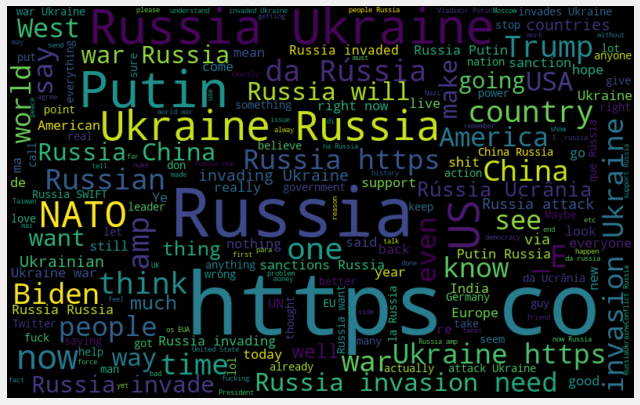

In [ ]:
allWords = ' '.join( [twts for twts in df_tweet['tweet']])
wordCloud = WordCloud(width = 800, height=500, random_state = 21, max_font_size = 110).generate(allWords)

plt.figure(figsize=(10,7))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# from google.colab import files

# df_tweet.to_csv('df.csv')
# files.download('df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

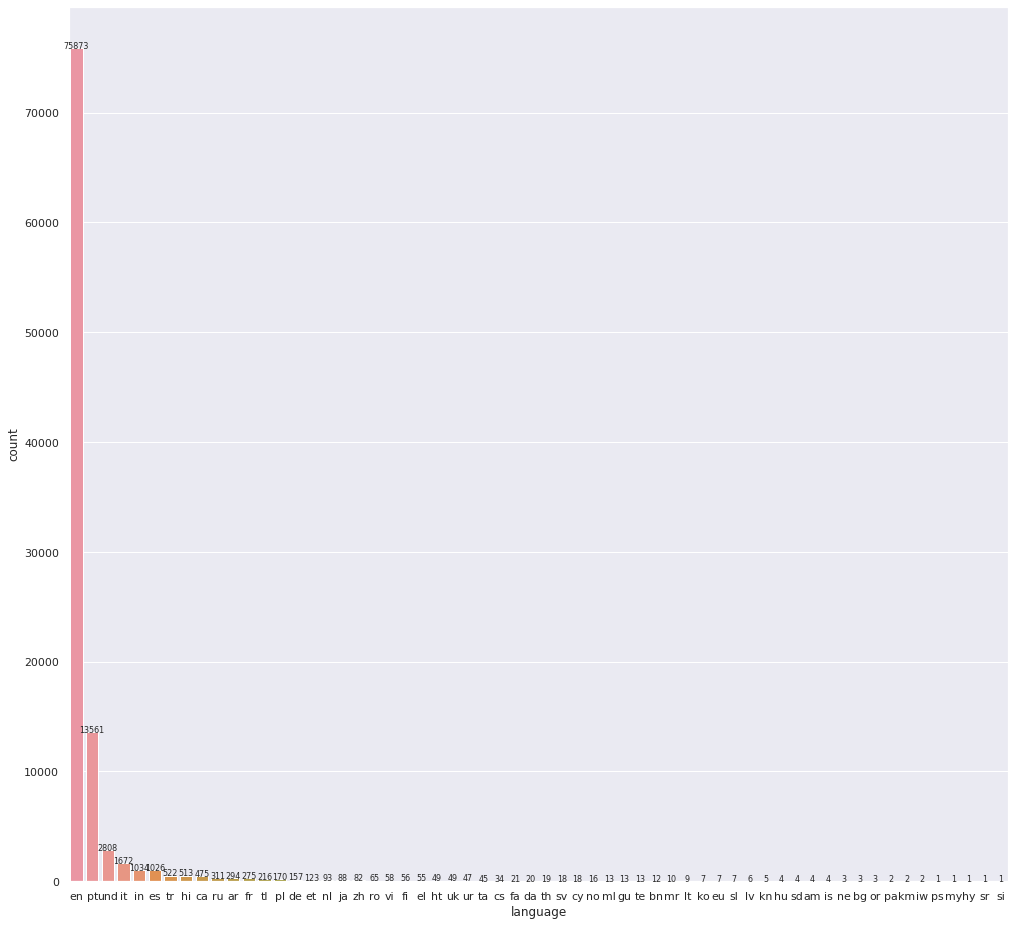

In [ ]:
ax = sns.countplot(x=df_tweet['language'],data= df_tweet, order = df_tweet['language'].value_counts().index)
sns.set(rc={'figure.figsize':(15,15)})
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        df_tweet['language'].value_counts()[i],ha="center", fontsize = 8)
    i += 1

In [ ]:
df_tweet['tweet'] = df_tweet['tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [13]:
from numpy.ma.core import negative
#create a fuction to compute the negative, neutral and postive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
   return 'Neutral'
  else:
    return 'Positive'
df_tweet['Analysis'] = df_tweet['Polarity'].apply(getAnalysis)    

In [14]:
df_tweet[['tweet', 'Analysis', 'Polarity', 'Subjectivity' ]]

,tweet,Analysis,Polarity,Subjectivity
0,_Kaz They're happening. Even in Russia. Saw im...,Positive,0.357143,0.464286
1,How can Putin act like this is driven by fear ...,Negative,-0.145000,0.475000
2,"He's bringing up Fortnite, cus maybe Fortn...",Positive,0.600000,0.550000
3,Idiots who brazenly promote their complete ig...,Negative,-0.006667,0.706667
4,russia fazia parte,Neutral,0.000000,0.000000
...,...,...,...,...
99996,Russia and China don't care about American land.,Neutral,0.000000,0.000000
99997,Gorbachev's Glasnot and perestroika started it...,Negative,-0.055556,0.777778
99998,That’s because the educational system faile...,Negative,-0.187500,0.462500
99999,Ukrainian cities and Chernobyl under siege as ...,Neutral,0.000000,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



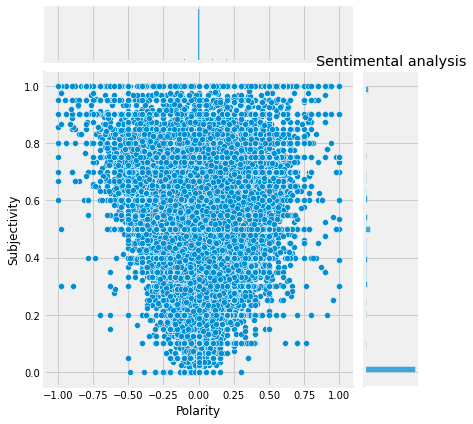

In [34]:
# df_norm_col=(df_tweet['Polarity'].mean())/df_tweet['Subjectivity'].std()
sns.jointplot(df_tweet['Polarity'],df_tweet['Subjectivity'], cmap='kde')
plt.title('Sentimental analysis')
plt.show()

In [15]:
ptweets = df_tweet[df_tweet['Analysis'] == 'Positive']
ptweets = ptweets['tweet']

round((ptweets.shape[0] / df_tweet.shape[0]) * 100,1)

29.0

In [16]:
ntweets = df_tweet[df_tweet['Analysis'] == 'Negative']
ntweets = ntweets['tweet']

round((ntweets.shape[0] / df_tweet.shape[0]) * 100,1)

21.6

In [17]:
neutweets = df_tweet[df_tweet['Analysis'] == 'Neutral']
neutweets = neutweets['tweet']

round((neutweets.shape[0] / df_tweet.shape[0]) * 100,1)

49.3

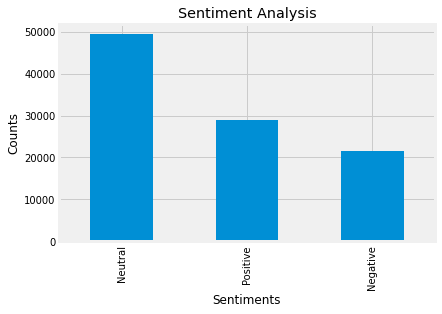

In [18]:
df_tweet['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df_tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()


In [31]:
# Top retweeted tweet
pd.set_option('display.max_colwidth', None)
df_tweet.head()




,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Subjectivity,Polarity,Analysis
0,1496898037641269253,1496897147173842955,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,786655582224777216,dmlitman,David Litman,NaN,_Kaz They're happening. Even in Russia. Saw images of a fairly large protest in St. Petersburg. But there needs to be even more around the world.,en,[],[],[],0,0,0,[],[],https://twitter.com/dmlitman/status/1496898037641269253,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Angelina_Kaz', 'name': 'Angelina Kazmaier', 'id': '300127774'}]",NaN,NaN,NaN,NaN,0.464286,0.357143,Positive
1,1496898037477789698,1496898037477789698,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1584640873,gm_silverman,Dan Silverman,NaN,"How can Putin act like this is driven by fear of a NATO attack on Russia proper, when (1) he has a vast nuclear arsenal, and (2) we're afraid to even touch his troops in third countries like Syria due to mutual escalation risk, let alone face them in a shooting war in Ukraine?",en,[],[],[],1,0,0,[],[],https://twitter.com/gm_silverman/status/1496898037477789698,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.475000,-0.145000,Negative
2,1496898037356142600,1496885342619668481,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,709061254090985472,acilith,Acilith,NaN,"He's bringing up Fortnite, cus maybe Fortnite have to get in touch with what's going on and for the fact that there are many players from Russia and Ukraine, who will play grands it'll be good for reschedule you monk",en,[],[],[],0,0,0,[],[],https://twitter.com/Acilith/status/1496898037356142600,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Ac7ionMan', 'name': 'Ac7ionMan', 'id': '770897068030320641'}, {'screen_name': 'MalibucaFN', 'name': 'TT9 Malibuca', 'id': '1294244589457543169'}, {'screen_name': 'stormyrite', 'name': 'FS Stormyrite', 'id': '1113783927691534336'}, {'screen_name': 'FNCompetitive', 'name': 'Fortnite Competitive', 'id': '1063139975120728065'}]",NaN,NaN,NaN,NaN,0.550000,0.600000,Positive
3,1496898037347598336,1496847460710469636,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,2503669940,rubenba40546243,Rhubarb,NaN,Idiots who brazenly promote their complete ignorance thinking they’re somehow clever or cute. They’re obviously neither. Imagine those fools living in Russia? No one is standing in their way to move there.,en,[],[],[],0,0,0,[],[],https://twitter.com/RubenBa40546243/status/1496898037347598336,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'joncoopertweets', 'name': 'Jon Cooper', 'id': '27493883'}]",NaN,NaN,NaN,NaN,0.706667,-0.006667,Negative
4,1496898036970229770,1496898036970229770,2022-02-24 17:21:17 UTC,2022-02-24,17:21:17,0,1145764266731028481,wecarolk,ca,NaN,russia fazia parte,it,[],[],[],0,0,0,[],[],https://twitter.com/wecarolk/status/1496898036970229770,False,https://twitter.com/rafakalimann_/status/1496825533795086341,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000000,0.000000,Neutral


In [32]:
df_tweet[['username','name','tweet','likes_count', 'language', 'Subjectivity', 'Polarity', 'Analysis' ]].sort_values(by=['likes_count'], ascending= False).head(5)

,username,name,tweet,likes_count,language,Subjectivity,Polarity,Analysis
70042,ukraine,Ukraine / Україна,"hey people, let’s demand to remove from here no place for an aggressor like Russia on Western social media platforms they should not be allowed to use these platforms to promote their image while brutally killing the Ukrainian people",54857,en,0.355556,-0.280556,Negative
96384,joshnbcnews,Josh Lederman,Ukraine’s ambassador to the US just told us that a Russian platoon from the 74th Motorized Brigade has surrendered to Ukraine’s forces. She says that the Russian troops apparently had been unaware they were being sent to kill Ukrainians. No confirmation yet from Russia’s military,35532,en,0.190000,-0.010000,Negative
82386,walshfreedom,Joe Walsh,My two cents: Putin made a big mistake. The world has changed. This isn’t 1987. Tanks rolling into a sovereign nation won’t be tolerated. The alliance of freedom-loving nations will defend Ukraine &amp; punish the hell out of Russia. He miscalculated. He made a big fucking mistake.,14261,en,0.333333,-0.200000,Negative
53770,adamkinzinger,Adam Kinzinger,"We must now send FIM-92 stinger missiles to Ukraine. The Javelins are doing a number on Russian tanks, time for their Air Force to feel some more pain. Russia",12755,en,0.250000,0.250000,Positive
57989,thomasvlinge,Thomas van Linge,"Ukraine 🇺🇦: anti-war protesters fill the streets in Moscow tonight, showing many people in Russia 🇷🇺 reject the Kremlin's aggression https://t.co/WKgKFqqogm",10420,en,0.500000,0.500000,Positive


In [33]:
df_tweet[['username','name','tweet','retweets_count', 'language', 'Subjectivity', 'Polarity', 'Analysis' ]].sort_values(by=['retweets_count'], ascending= False).head(5)

,username,name,tweet,retweets_count,language,Subjectivity,Polarity,Analysis
70042,ukraine,Ukraine / Україна,"hey people, let’s demand to remove from here no place for an aggressor like Russia on Western social media platforms they should not be allowed to use these platforms to promote their image while brutally killing the Ukrainian people",11511,en,0.355556,-0.280556,Negative
96384,joshnbcnews,Josh Lederman,Ukraine’s ambassador to the US just told us that a Russian platoon from the 74th Motorized Brigade has surrendered to Ukraine’s forces. She says that the Russian troops apparently had been unaware they were being sent to kill Ukrainians. No confirmation yet from Russia’s military,8812,en,0.190000,-0.010000,Negative
57989,thomasvlinge,Thomas van Linge,"Ukraine 🇺🇦: anti-war protesters fill the streets in Moscow tonight, showing many people in Russia 🇷🇺 reject the Kremlin's aggression https://t.co/WKgKFqqogm",2961,en,0.500000,0.500000,Positive
81752,christogrozev,Christo Grozev,"Incredible. Germany, Italy, Hungary and Cyprus are blocking a decision to disconnect Russia from the SWIFT network. I expected Italy, Hungary and Cyprus. But GERMANY? Shameful. https://t.co/xYdcrUj5cP",2530,en,0.650000,0.400000,Positive
53770,adamkinzinger,Adam Kinzinger,"We must now send FIM-92 stinger missiles to Ukraine. The Javelins are doing a number on Russian tanks, time for their Air Force to feel some more pain. Russia",2177,en,0.250000,0.250000,Positive
